## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [94]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [95]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [96]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [97]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [98]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [99]:
df.dropna(inplace=True)

In [100]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [101]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [102]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [103]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [104]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [105]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [106]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [107]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [108]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [109]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [110]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [111]:
import seaborn as sns

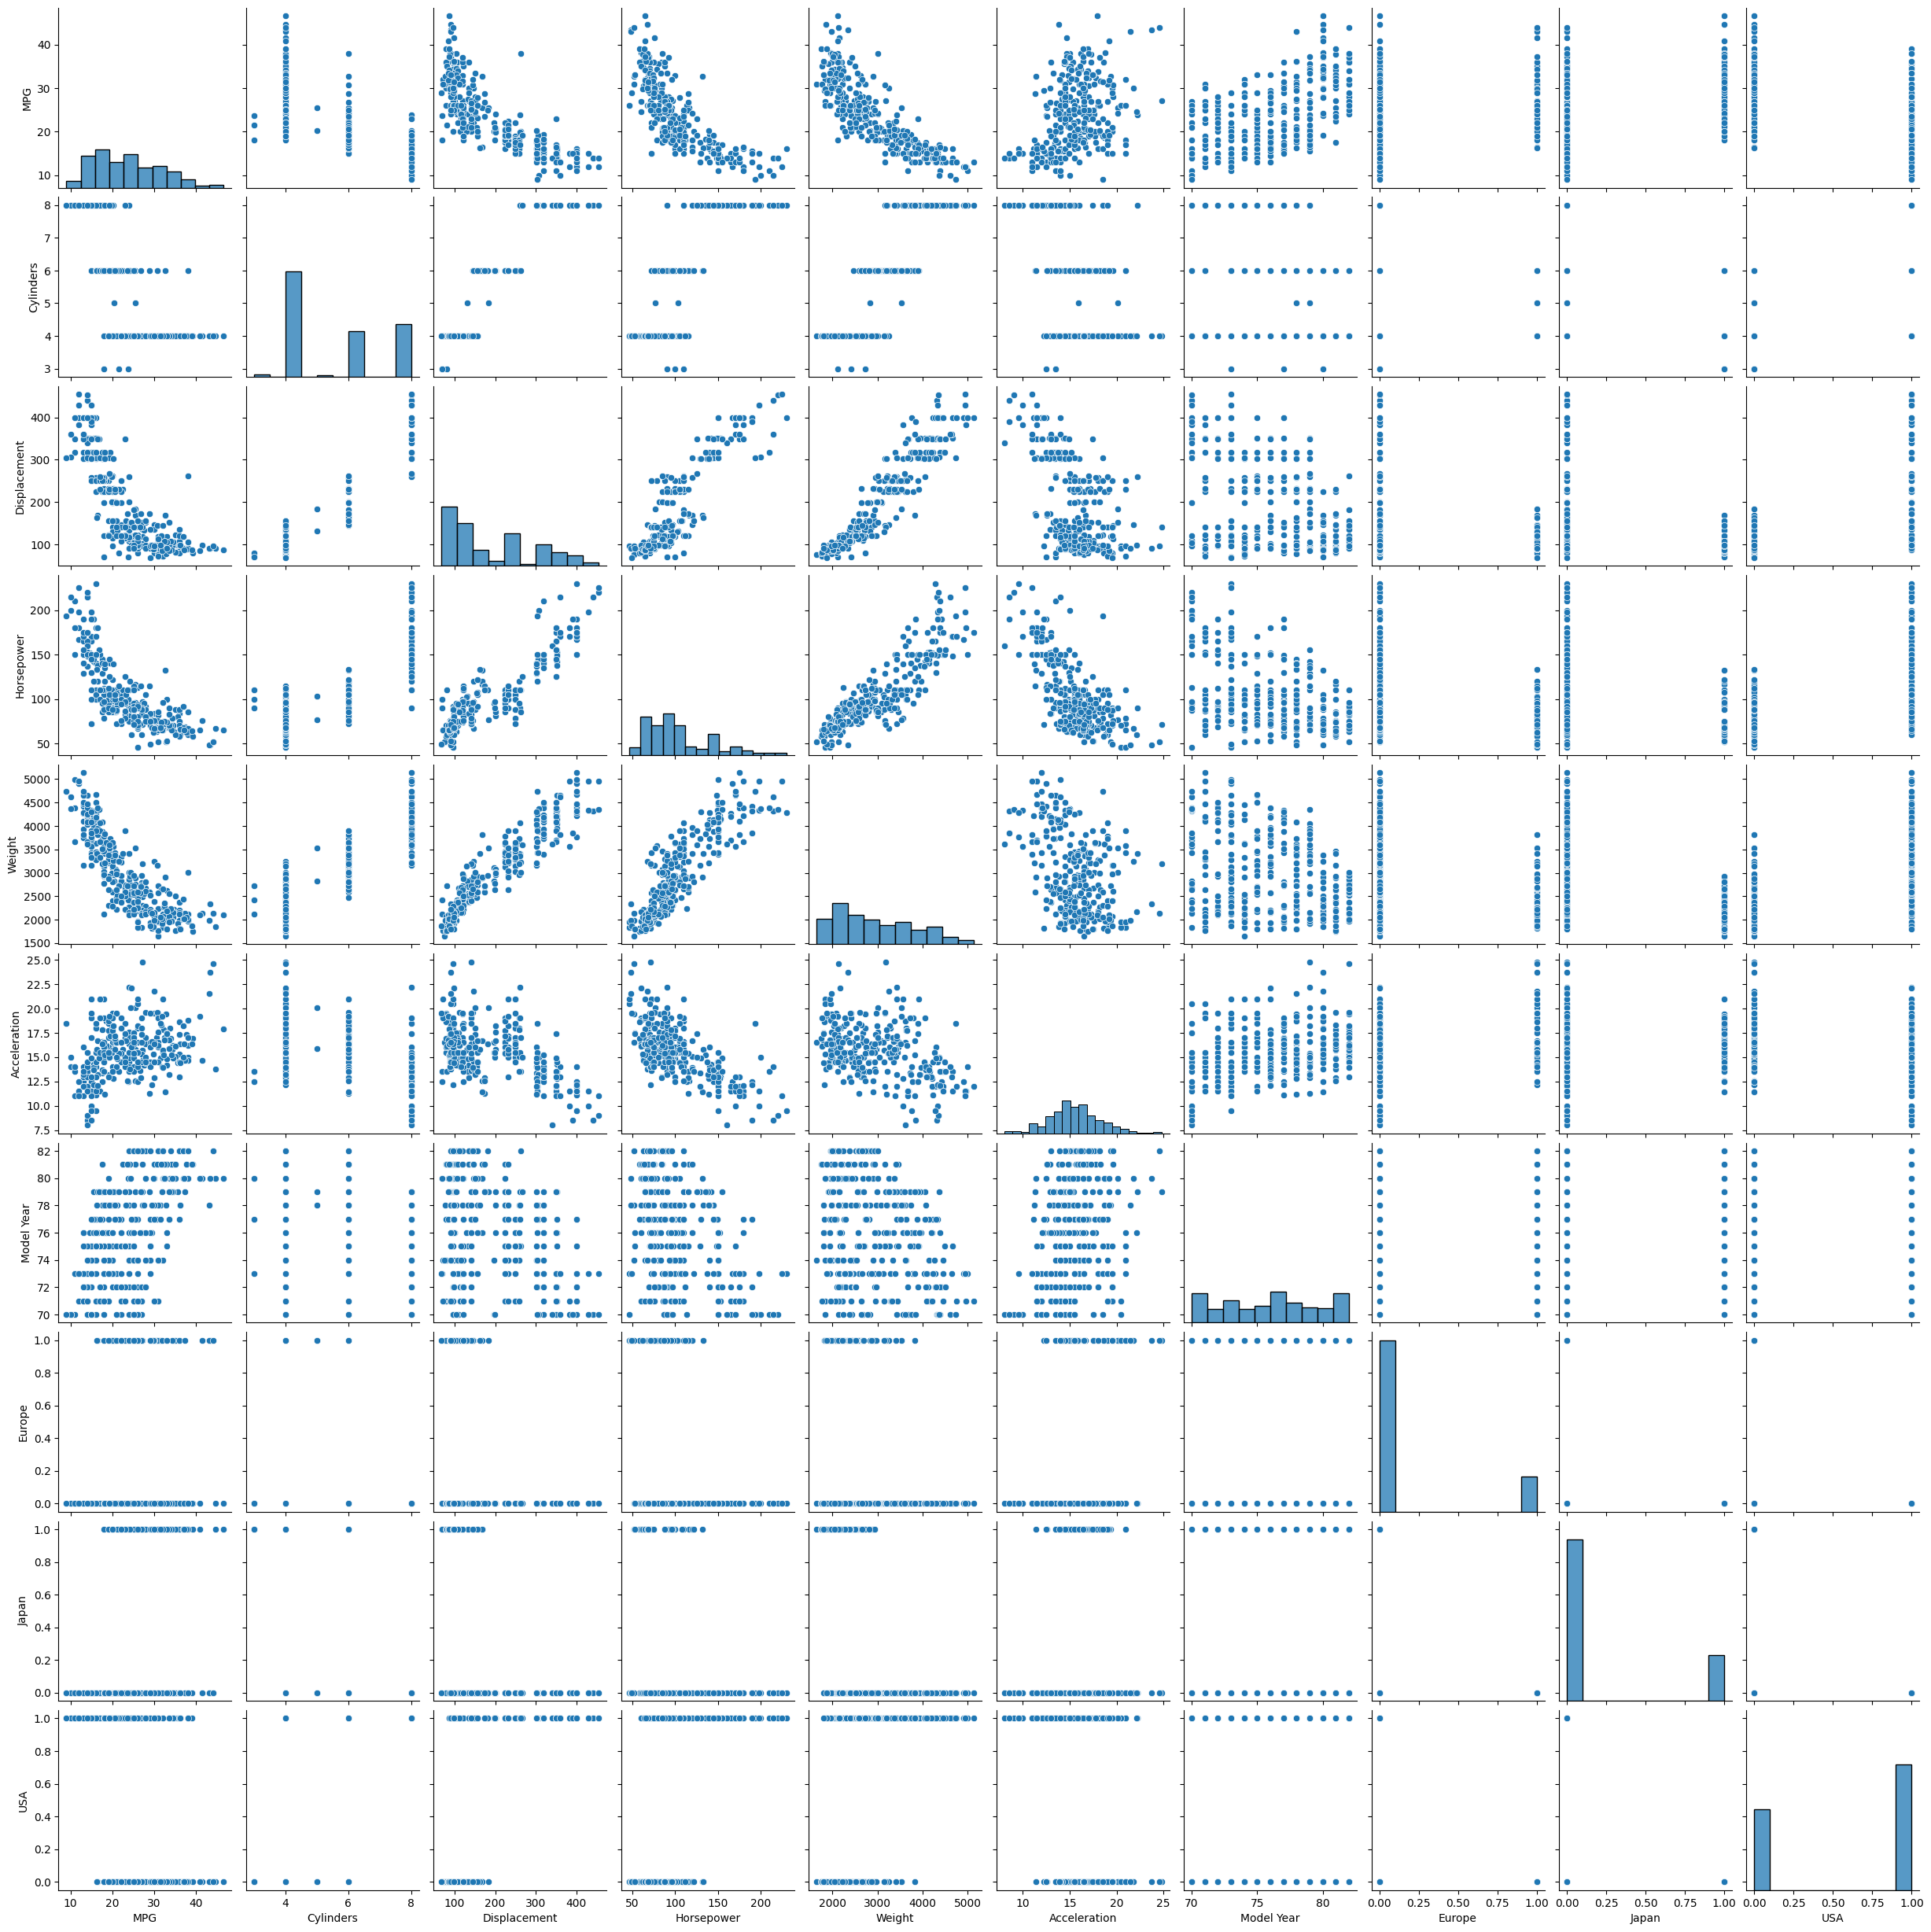

In [112]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [113]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

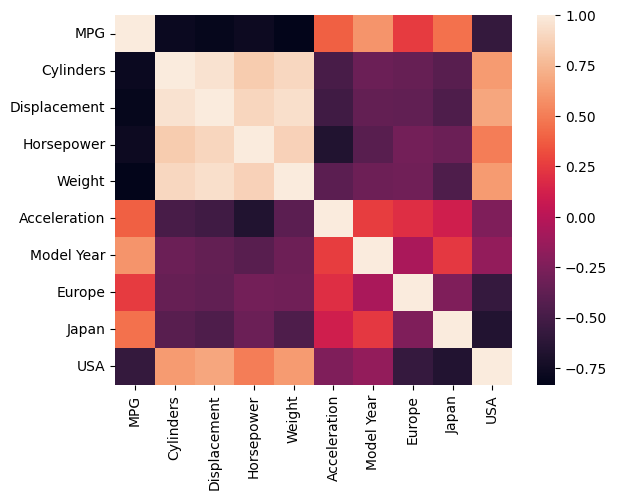

In [114]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [115]:
train_X = train.copy()
test_X = test.copy()

In [116]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [117]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [118]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [119]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int32
Japan             int32
USA               int32
dtype: object

Construyamos los modelos usando tensorflow

In [120]:
import tensorflow as tf

In [121]:
tf.__version__

'2.17.0'

Capa de normalización y Variables Base

In [122]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [123]:
Variables = ["Displacement", "Horsepower", "Weight", "Acceleration"]
Cantidad = len(Variables)

## Modelos Base

In [124]:
Var_Base = np.array(train_X[Variables])

norm_base = tf.keras.layers.Normalization(input_shape=[Cantidad,])

norm_base.adapt(Var_Base)

c:\Users\Jeronimo Vargas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
import matplotlib.pyplot as plt
test_res = {}
test_res
modelo_base = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_base.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_base.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [126]:
%%time
history_Base = modelo_base.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 23.5673 - val_loss: 21.8536
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2925 - val_loss: 21.3349
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.7166 - val_loss: 20.7267
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3390 - val_loss: 19.9292
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.8236 - val_loss: 18.8524
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.1098 - val_loss: 17.4063
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.6221 - val_loss: 15.7398
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.9241 - val_loss: 14.1376
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.8837 - val_loss: 12.5636
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.5230 - val_loss: 10.6073
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2999 - val_loss: 8.3486
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - 

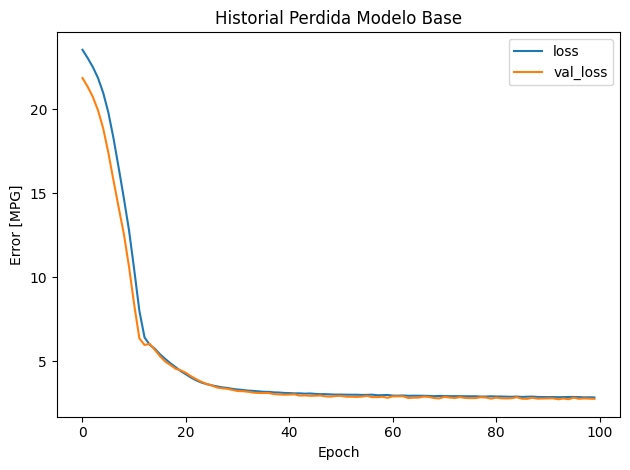

In [127]:
plt.plot(history_Base.history['loss'], label='loss')
plt.plot(history_Base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial Perdida Modelo Base")
plt.legend()
plt.tight_layout()
plt.savefig("Perdida_Modelo_Base.png")

In [128]:
test_res['Modelo_Base'] = modelo_base.evaluate(
    test_X[Variables], test_y,
    verbose=0)
test_res

{'Modelo_Base': 2.659536600112915}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


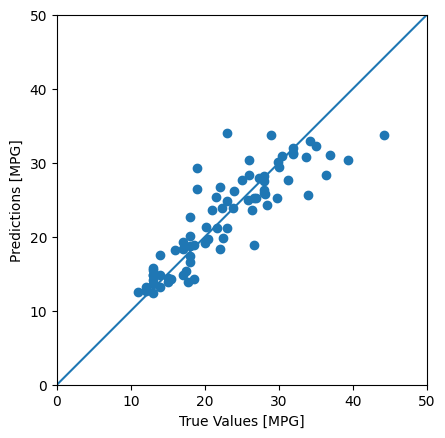

In [129]:
test_pred_base = modelo_base.predict(test_X[Variables]).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred_base)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

## Modelos Distintas Neuronas

### 16 Neuronas

In [130]:
modelo_16_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_16_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_16_Neuronas.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 9 (40.00 B)

In [131]:
%%time
history_16_Neuronas = modelo_16_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 24.0411 - val_loss: 22.5191
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.9745 - val_loss: 22.4202
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.7554 - val_loss: 22.3272
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.0422 - val_loss: 22.2378
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.5497 - val_loss: 22.1466
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.8666 - val_loss: 22.0526
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.6527 - val_loss: 21.9462
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8756 - val_loss: 21.8184
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2049 - val_loss: 21.6676
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.1358 - val_loss: 21.4917
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.5244 - val_loss: 21.2910
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step -

In [132]:
test_res['Modelo_16_Neuronas'] = modelo_16_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.659536600112915, 'Modelo_16_Neuronas': 2.955112934112549}

### 32 Neuronas

In [133]:
modelo_32_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_32_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_32_Neuronas.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,258 (4.92 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 9 (40.00 B)

In [134]:
%%time
history_32_Neuronas = modelo_32_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 24.1214 - val_loss: 21.9149
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.5506 - val_loss: 21.6603
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.1299 - val_loss: 21.3715
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.6808 - val_loss: 21.0252
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.0634 - val_loss: 20.5989
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1569 - val_loss: 20.0767
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.3697 - val_loss: 19.4295
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.6785 - val_loss: 18.6083
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.7504 - val_loss: 17.5885
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.1713 - val_loss: 16.3524
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.5620 - val_loss: 14.9545
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

In [135]:
test_res['Modelo_32_Neuronas'] = modelo_32_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243}

### 128 Neuronas

In [136]:
modelo_128_Neuronas = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
  ])

modelo_128_Neuronas.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

modelo_128_Neuronas.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,290 (67.54 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 9 (40.00 B)

In [137]:
%%time
history_128_Neuronas = modelo_128_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 23.9157 - val_loss: 21.3709
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8260 - val_loss: 20.1930
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.3025 - val_loss: 18.5738
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.0259 - val_loss: 16.5707
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.1664 - val_loss: 14.5617
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1107 - val_loss: 12.5583
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.8396 - val_loss: 9.8751
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.5902 - val_loss: 7.2648
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.2107 - val_loss: 6.5046
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.8108 - val_loss: 6.4476
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.7677 - val_loss: 5.7946
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.

In [138]:
test_res['Modelo_128_Neuronas'] = modelo_128_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158}

### Graficas

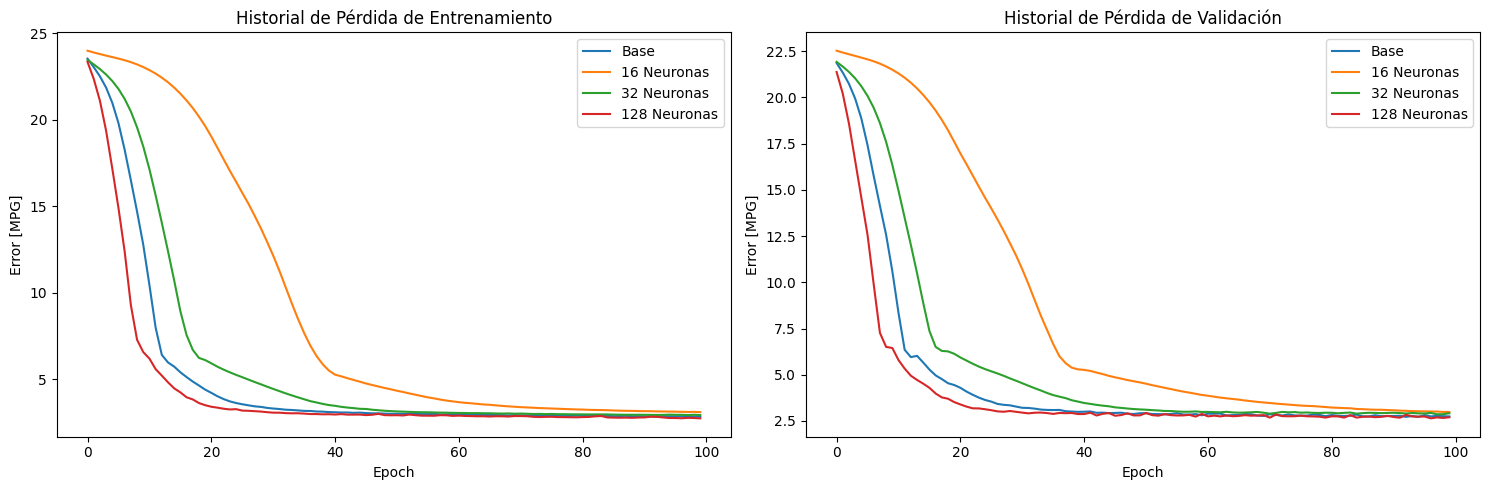

In [139]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_16_Neuronas.history['loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_16_Neuronas.history['val_loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['val_loss'], label='32 Neuronas')
plt.plot(history_128_Neuronas.history['val_loss'], label='128 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Neuronas.png")

## Modelos Distintas Capas

### 1 Capa

In [140]:
modelo_1_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

modelo_1_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_1_Capa.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 9 (40.00 B)

In [141]:
%%time
history_1_Capa = modelo_1_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 23.6437 - val_loss: 22.3359
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.9438 - val_loss: 22.1486
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.6338 - val_loss: 21.9624
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.6575 - val_loss: 21.7755
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.5915 - val_loss: 21.5895
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.1914 - val_loss: 21.3998
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.8006 - val_loss: 21.2002
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.7998 - val_loss: 20.9897
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0128 - val_loss: 20.7727
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.8396 - val_loss: 20.5378
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.7943 - val_loss: 20.2890
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

In [142]:
test_res['Modelo_1_Capa'] = modelo_1_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res


{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158,
 'Modelo_1_Capa': 2.8595361709594727}

### 2 Capas

In [143]:
modelo_2_Capa = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2)
  ])

In [144]:
modelo_2_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [145]:
modelo_2_Capa.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,619 (18.05 KB)

 Trainable params: 4,610 (18.01 KB)

 Non-trainable params: 9 (40.00 B)

In [146]:
%%time
history_2_Capa = modelo_2_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 23.4603 - val_loss: 22.1640
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.6883 - val_loss: 21.7348
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9540 - val_loss: 21.2143
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.2390 - val_loss: 20.5649
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 21.6460 - val_loss: 19.7245
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.1406 - val_loss: 18.6321
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.8055 - val_loss: 17.2006
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.9267 - val_loss: 15.5857
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.0329 - val_loss: 13.8658
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.5093 - val_loss: 12.2501
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.7442 - val_loss: 10.4211
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

In [147]:
test_res['Modelo_5_Capa'] = modelo_2_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158,
 'Modelo_1_Capa': 2.8595361709594727,
 'Modelo_5_Capa': 2.6717467308044434}

### 5 Capas

In [148]:
modelo_5_Capa = tf.keras.Sequential([
    norm_base,  # Capa de normalización
    tf.keras.layers.Dense(64, activation='relu'),  # Primera capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Segunda capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Tercera capa oculta con 64 unidades
    tf.keras.layers.Dense(64, activation='relu'),  # Cuarta capa oculta con 64 unidades
    tf.keras.layers.Dense(5)  # Capa de salida con 5 neuronas (sin activación explícita)
])

modelo_5_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_5_Capa.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,134 (51.31 KB)

 Trainable params: 13,125 (51.27 KB)

 Non-trainable params: 9 (40.00 B)

In [149]:
%%time
history_5_Capa = modelo_5_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 23.2609 - val_loss: 22.2363
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.4190 - val_loss: 21.7713
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.2877 - val_loss: 20.7160
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.0676 - val_loss: 18.2778
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.8010 - val_loss: 14.1085
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.7264 - val_loss: 9.7314
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.3601 - val_loss: 8.0308
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7006 - val_loss: 5.4878
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0891 - val_loss: 5.0606
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.3016 - val_loss: 4.9000
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7629 - val_loss: 4.6012
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.82

In [150]:
test_res['Modelo_5_Capa'] = modelo_5_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)
test_res

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158,
 'Modelo_1_Capa': 2.8595361709594727,
 'Modelo_5_Capa': 2.7109715938568115}

### Gráficas

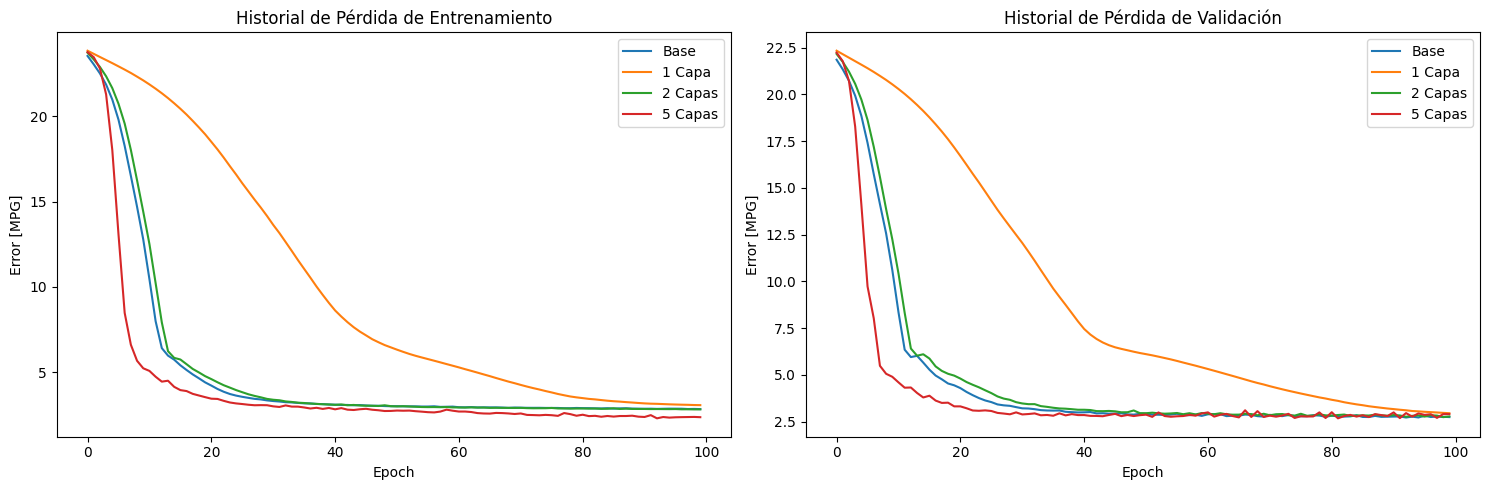

In [151]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_1_Capa.history['loss'], label='1 Capa')
plt.plot(history_2_Capa.history['loss'], label='2 Capas')
plt.plot(history_5_Capa.history['loss'], label='5 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_1_Capa.history['val_loss'], label='1 Capa')
plt.plot(history_2_Capa.history['val_loss'], label='2 Capas')
plt.plot(history_5_Capa.history['val_loss'], label='5 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Capas.png")

## Modelos Distintas Funciones Activación

### TanH: tangente hiperbólica

In [154]:
modelo_TanH = tf.keras.Sequential([
        norm_base,
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])

modelo_TanH.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_TanH.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [155]:
%%time
history_TanH = modelo_TanH.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 24.3056 - val_loss: 22.3771
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.3074 - val_loss: 22.2316
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.1989 - val_loss: 22.0505
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.2322 - val_loss: 21.8241
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.7369 - val_loss: 21.4931
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 22.9959 - val_loss: 21.0691
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.4690 - val_loss: 20.4840
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.8219 - val_loss: 19.7214
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.1781 - val_loss: 18.6919
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.7259 - val_loss: 17.2858
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.7127 - val_loss: 15.5711
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

### Sigmoide

In [156]:
modelo_Sig = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])

modelo_Sig.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_Sig.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [157]:
%%time
history_Sig = modelo_Sig.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Sig'] = modelo_Sig.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 24.0097 - val_loss: 22.5578
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.5819 - val_loss: 21.7205
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.9733 - val_loss: 20.9042
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.1311 - val_loss: 20.1218
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.3142 - val_loss: 19.3823
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.5945 - val_loss: 18.6906
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.0934 - val_loss: 18.0471
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.6210 - val_loss: 17.4473
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.7523 - val_loss: 16.8863
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.7270 - val_loss: 16.3575
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.8406 - val_loss: 15.8542
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158,
 'Modelo_1_Capa': 2.8595361709594727,
 'Modelo_5_Capa': 2.7109715938568115,
 'Modelo_Sig': 3.3126635551452637}

### ELU (Exponential Linear Unit)


In [164]:
modelo_ELU = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='elu'),
      tf.keras.layers.Dense(64, activation='elu'),
      tf.keras.layers.Dense(1)
  ])

modelo_ELU.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

modelo_ELU.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [165]:
%%time
history_ELU = modelo_ELU.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_ELU'] = modelo_ELU.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 24.0004 - val_loss: 22.2379
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.9513 - val_loss: 22.0110
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9319 - val_loss: 21.7404
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.7473 - val_loss: 21.3694
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.2283 - val_loss: 20.8716
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.1478 - val_loss: 20.2006
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.1316 - val_loss: 19.2978
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.2231 - val_loss: 18.0952
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.7304 - val_loss: 16.5815
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.5137 - val_loss: 14.6602
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15.1281 - val_loss: 12.3087
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

{'Modelo_Base': 2.659536600112915,
 'Modelo_16_Neuronas': 2.955112934112549,
 'Modelo_32_Neuronas': 2.682016611099243,
 'Modelo_128_Neuronas': 2.633789539337158,
 'Modelo_1_Capa': 2.8595361709594727,
 'Modelo_5_Capa': 2.7109715938568115,
 'Modelo_Sig': 3.3126635551452637,
 'Modelo_ReLU': 2.6811158657073975,
 'Modelo_ELU': 2.678128480911255}

### Gráficas

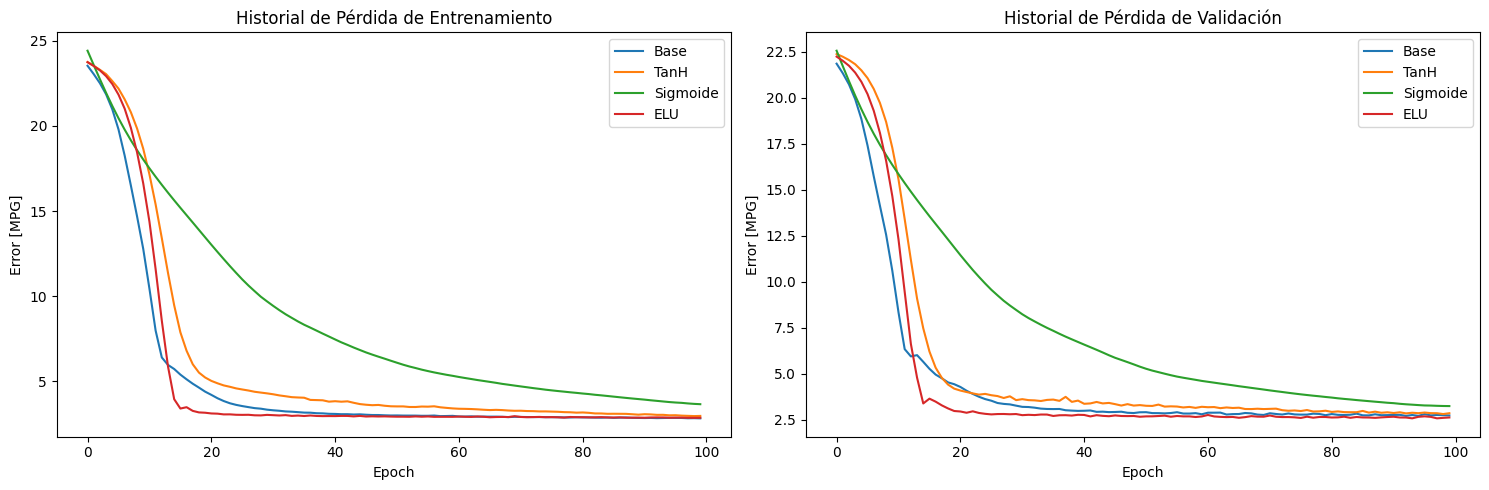

In [167]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_TanH.history['loss'], label='TanH')
plt.plot(history_Sig.history['loss'], label='Sigmoide')
plt.plot(history_ELU.history['loss'], label='ELU')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_TanH.history['val_loss'], label='TanH')
plt.plot(history_Sig.history['val_loss'], label='Sigmoide')
plt.plot(history_ELU.history['val_loss'], label='ELU')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()

plt.tight_layout()
plt.savefig("Perdida_Funcion.png")